# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_count = len(cities)

#create a query url
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
lat= []
lng = []
city = []

#loop through cities and do a weather check on each city.
for x in range(city_count):
    response = requests.get(query_url + cities[x]).json()
    print(f"Processing Record {x} of Set something | {cities[x]}.")
    try:
        #print(cities[x])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
    except: 
        print('City not found. Skipping...')
        
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Processing Record 0 of Set something | busselton.
Processing Record 1 of Set something | stryn.
Processing Record 2 of Set something | victoria.
Processing Record 3 of Set something | port alfred.
Processing Record 4 of Set something | pangnirtung.
Processing Record 5 of Set something | grand gaube.
Processing Record 6 of Set something | tasiilaq.
Processing Record 7 of Set something | grand river south east.
City not found. Skipping...
Processing Record 8 of Set something | punta arenas.
Processing Record 9 of Set something | mys shmidta.
City not found. Skipping...
Processing Record 10 of Set something | flin flon.
Processing Record 11 of Set something | viedma.
Processing Record 12 of Set something | vostok.
Processing Record 13 of Set something | wamba.
Processing Record 14 of Set something | hermanus.
Processing Record 15 of Set something | mount gambier.
Processing Record 16 of Set something | dikson.
Processing Record 17 of Set something | de aar.
Processing Record 18 of Set som

Processing Record 154 of Set something | khatanga.
Processing Record 155 of Set something | sioux lookout.
Processing Record 156 of Set something | fortuna.
Processing Record 157 of Set something | saint-philippe.
Processing Record 158 of Set something | butaritari.
Processing Record 159 of Set something | saskylakh.
Processing Record 160 of Set something | den helder.
Processing Record 161 of Set something | new norfolk.
Processing Record 162 of Set something | abrau-dyurso.
Processing Record 163 of Set something | laguna.
Processing Record 164 of Set something | ust-nera.
Processing Record 165 of Set something | qaanaaq.
Processing Record 166 of Set something | pandan.
Processing Record 167 of Set something | marsh harbour.
Processing Record 168 of Set something | upernavik.
Processing Record 169 of Set something | kingaroy.
Processing Record 170 of Set something | kendari.
Processing Record 171 of Set something | hvide sande.
Processing Record 172 of Set something | satitoa.
City no

Processing Record 305 of Set something | lavrentiya.
Processing Record 306 of Set something | champerico.
Processing Record 307 of Set something | vardo.
Processing Record 308 of Set something | moussoro.
Processing Record 309 of Set something | chongwe.
Processing Record 310 of Set something | norman wells.
Processing Record 311 of Set something | taoudenni.
Processing Record 312 of Set something | buchanan.
Processing Record 313 of Set something | sarakhs.
Processing Record 314 of Set something | hithadhoo.
Processing Record 315 of Set something | kisangani.
Processing Record 316 of Set something | pierre.
Processing Record 317 of Set something | verkhnevilyuysk.
Processing Record 318 of Set something | mana.
Processing Record 319 of Set something | fuerte olimpo.
Processing Record 320 of Set something | parobe.
Processing Record 321 of Set something | kahului.
Processing Record 322 of Set something | komagane.
Processing Record 323 of Set something | roma.
Processing Record 324 of S

Processing Record 460 of Set something | vaitape.
Processing Record 461 of Set something | namatanai.
Processing Record 462 of Set something | progreso.
Processing Record 463 of Set something | bend.
Processing Record 464 of Set something | salalah.
Processing Record 465 of Set something | nagato.
Processing Record 466 of Set something | revelstoke.
Processing Record 467 of Set something | umm ruwabah.
City not found. Skipping...
Processing Record 468 of Set something | rundu.
Processing Record 469 of Set something | nador.
Processing Record 470 of Set something | puerto baquerizo moreno.
Processing Record 471 of Set something | rosita.
Processing Record 472 of Set something | westport.
Processing Record 473 of Set something | latung.
Processing Record 474 of Set something | volterra.
Processing Record 475 of Set something | vila velha.
Processing Record 476 of Set something | touros.
Processing Record 477 of Set something | coracao de maria.
Processing Record 478 of Set something | se

Processing Record 617 of Set something | tadine.
Processing Record 618 of Set something | nizwa.
Processing Record 619 of Set something | bayan.
Processing Record 620 of Set something | tottori.
Processing Record 621 of Set something | banda aceh.
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#convert to data frame

weather_data = pd.DataFrame({"City": city, "Lat": lat, "Lng": lng, "Max Temp": max_temp, 
    "Humidity" : humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed,
    "Country": country, "Date": date})

#save as a csv
weather_data.to_csv("weather_data_file.csv", encoding='utf-8')

weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,22.22,39,4,4.74,AU,1587802108
1,Stryn,61.90,6.72,7.00,65,20,3.10,NO,1587802108
2,Hong Kong,22.29,114.16,22.78,68,40,3.10,HK,1587801603
3,Port Alfred,-33.59,26.89,19.44,97,84,0.89,ZA,1587802109
4,Pangnirtung,66.15,-65.71,-0.72,90,89,3.13,CA,1587802109
...,...,...,...,...,...,...,...,...,...
573,Tadine,-21.55,167.88,22.85,72,100,6.30,NC,1587802261
574,Nizwá,22.93,57.53,37.06,7,0,1.82,OM,1587802261
575,Bayan,46.08,127.40,12.78,26,100,6.19,CN,1587802261
576,Tottori-shi,35.50,134.23,22.00,17,0,6.70,JP,1587802261


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
weather_data["Humidity"].max()

100

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

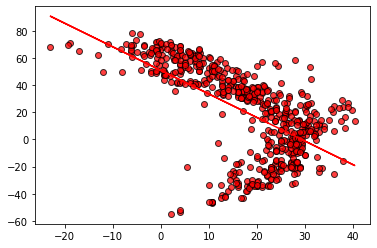

In [9]:
x_axis = weather_data['Max Temp']
y_axis = weather_data['Lat']
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

## Latitude vs. Humidity Plot

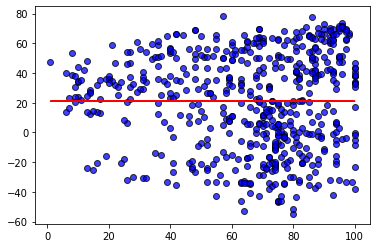

In [10]:
x_axis = weather_data['Humidity']
y_axis = weather_data['Lat']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

## Latitude vs. Cloudiness Plot

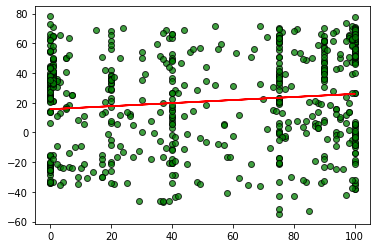

In [11]:
x_axis = weather_data['Cloudiness']
y_axis = weather_data['Lat']
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black", alpha=0.75)

#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

## Latitude vs. Wind Speed Plot

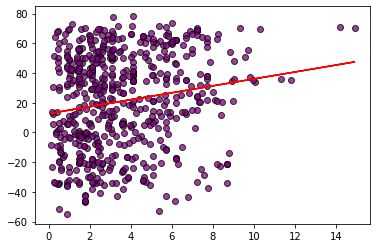

In [12]:
x_axis = weather_data['Wind Speed']
y_axis = weather_data['Lat']
plt.scatter(x_axis, y_axis, marker="o", facecolors="purple", edgecolors="black", alpha=0.75)

#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames

north_hem_weather_data = weather_data.loc[weather_data['Lat'] > 0]
south_hem_weather_data = weather_data.loc[weather_data['Lat'] < 0 ]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

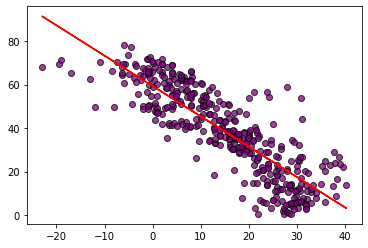

In [14]:
x_axis = north_hem_weather_data['Max Temp']
y_axis = north_hem_weather_data['Lat']

plt.scatter(x_axis, y_axis, marker="o", facecolors="purple", edgecolors="black", alpha=0.75)

#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

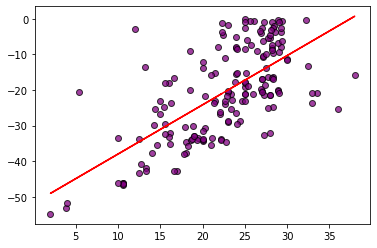

In [15]:
x_axis = south_hem_weather_data['Max Temp']
y_axis = south_hem_weather_data['Lat']

plt.scatter(x_axis, y_axis, marker="o", facecolors="purple", edgecolors="black", alpha=0.75)

#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

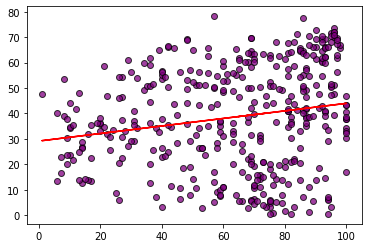

In [16]:
x_axis = north_hem_weather_data['Humidity']
y_axis = north_hem_weather_data['Lat']

plt.scatter(x_axis, y_axis, marker="o", facecolors="purple", edgecolors="black", alpha=0.75)

#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

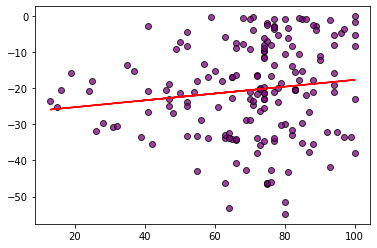

In [17]:
x_axis = south_hem_weather_data['Humidity']
y_axis = south_hem_weather_data['Lat']

plt.scatter(x_axis, y_axis, marker="o", facecolors="purple", edgecolors="black", alpha=0.75)

#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

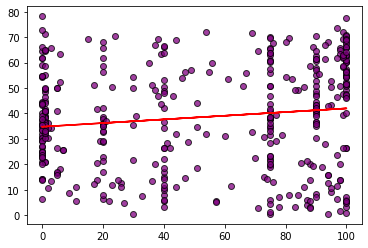

In [18]:
x_axis = north_hem_weather_data['Cloudiness']
y_axis = north_hem_weather_data['Lat']

plt.scatter(x_axis, y_axis, marker="o", facecolors="purple", edgecolors="black", alpha=0.75)

#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

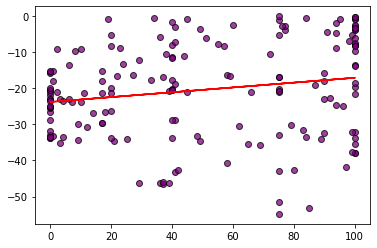

In [19]:
x_axis = south_hem_weather_data['Cloudiness']
y_axis = south_hem_weather_data['Lat']

plt.scatter(x_axis, y_axis, marker="o", facecolors="purple", edgecolors="black", alpha=0.75)

#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

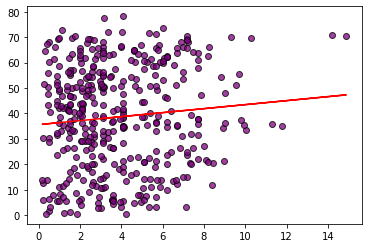

In [20]:
x_axis = north_hem_weather_data['Wind Speed']
y_axis = north_hem_weather_data['Lat']

plt.scatter(x_axis, y_axis, marker="o", facecolors="purple", edgecolors="black", alpha=0.75)

#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

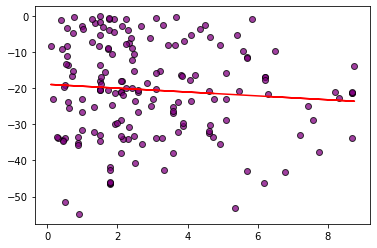

In [21]:
x_axis = south_hem_weather_data['Wind Speed']
y_axis = south_hem_weather_data['Lat']

plt.scatter(x_axis, y_axis, marker="o", facecolors="purple", edgecolors="black", alpha=0.75)

#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values,"r-")